# Statistics - Exercises ✍️✍️

## Definitions

*Use the following information to answer the next two questions: A grocery store is interested in how much money, on average, their customers spend each visit in the produce department. Using their store records, they draw a sample of 1,000 visits and calculate each customer’s average spending on produce.*

1. Identify: the population, sample, parameter, statistic, variable, and data for this example.

2. What kind of data is “amount of money spent on produce per visit”?

3. The manager of a department store decides to measure employee satisfaction by selecting four departments at random, and conducting interviews with all the employees in those four departments. What type of sampling is this?

## Basic sample statistics

1. Given the sample : 4, 10, 7, 7, 6, 9, 3, 8, 9

Find the following sample statistics :

a) the mode,

b) the median,

c) the mean,

d) the sample standard deviation (rounded to 2 decimal places).

e) If we replace the data value 6 in the data set above by 24, will the standard deviation increase, decrease or stay the same?

In [ ]:
# EXERCICE 1
# # On peut utiliser pandas ou statistics pour les fonctions demandées
import statistics
import pandas as pd

list = [ 4, 10, 7, 7, 6, 9, 3, 8, 9]
pd_list = pd.Series(list)

print(f"Mode :{pd_list.mode().values}")
print(f"Median : {statistics.median(list)}")
print(f"Mean : {statistics.mean(list)}")
print(f"Std dev : {pd_list.std()}")

# Calcul manuel 'pour le fun' de la std dev (racine de la moyenne des carrés de la dif i-médiane)
m = statistics.mean(list)
st_dev = [(i-m)**2 for i in list]
sum=0
for i in st_dev:
    sum += i

# On travaille avec un sample donc on divise par N-1
print("std dev is equal to the square root of",sum, "divided by", len(st_dev),"-1 which is", ((sum/(len(st_dev)-1))**(1/2)))

pd_list= pd_list.replace(6,24)
print(f"Nouvelle std dev après remplacement : {pd_list.std()}")

2. Given the data set: 62 , 65 , 68 , 70 , 72 , 74 , 76 , 78 , 80 , 82 , 96 , 101

Find

a) the median,

b) the first quartile,

c) the third quartile,

d) the interquartile range (IQR).

In [17]:
# EXERCICE 2
import pandas as pd
data = [62 , 65 , 68 , 70 , 72 , 74 , 76 , 78 , 80 , 82 , 96 , 101]
data.sort()

ds = pd.Series(data)

print(f"The median : {ds.mean()}")
print(f"First quartile : {ds.quantile(0.25, interpolation='midpoint')}")
print(f"Third quartile : {ds.quantile(0.75, interpolation='midpoint')}")
print(f"Interquartile range is : {ds.quantile(0.75, interpolation='midpoint')-ds.quantile(0.25, interpolation='midpoint')}")

The median : 77.0
First quartile : 69.0
Third quartile : 81.0
Interquartile range is : 12.0


3. In a symmetrical distribution what will be the relationship among the mean, median, and mode?

*Use the following sample to answer the next three questions: 10, 11, 15, 15, 17, 22*

4. Compute the mean and standard deviation for this data (rounded to two decimal places) 

5. Are there abnormal values in the sample?

6. Express the number 13.7 in terms of the mean and standard deviation of this data.

In [40]:
# EXERCICE 3
import pandas as pd

list = [10, 11, 15, 15, 17, 22]

ds = pd.Series(list)

m = ds.mean().round(2)
s = ds.std()
print(f"Mean : {m}")
print(f"Std dev : {round(s,2)}")

print(f"Three std dev below the mean is ", round(m-(3*s),2))
print(f"Three std dev above the mean is ", round(m+(3*s),2))

for i in list:
    z = (i-m)/s

    if abs(z)>3:
        print(i, "is an abnormal value (z-score =",round(z,2),")")
    else:
        print(i, "is a normal value (z-score =",round(z,2),")")

print("The z-score of 13.7 is",round((13.7-m)/s,2))

Mean : 15.0
Std dev : 4.34
Three std dev below the mean is  1.99
Three std dev above the mean is  28.01
10 is a normal value (z-score = -1.15 )
11 is a normal value (z-score = -0.92 )
15 is a normal value (z-score = 0.0 )
15 is a normal value (z-score = 0.0 )
17 is a normal value (z-score = 0.46 )
22 is a normal value (z-score = 1.61 )
The z-score of 13.7 is -0.3


## Covariance and correlation

A supermarket has conducted several advertisement campaigns. They would like to analyze the relationship between the advertisement cost and the sales revenue.

Let $X$ and $Y$ be the advertisement cost and the sales revenue. We have a sample of $n=10$ values for $X$ and $Y$, sorted such that $X_i$, $Y_i$ are the results of the $i$-th marketing campaign :

$X$ : 39, 65, 62, 90, 82, 75, 25, 98, 36, 78

$Y$ : 47, 53, 58, 86, 62, 68, 60, 91, 51, 84

1. Compute the sample means $\bar X$ and $\bar Y$

2. Compute the sample standard deviations $s_X$ and $s_Y$

3. Compute the covariance between $X$ and $Y$

4. Compute Pearson's correlation coefficient between $X$ and $Y$

5. What can you conclude ?

X mean is 65.0
Y mean is 66.0
The means are:


x    65.0
y    66.0
dtype: float64

The std devs are:


x    24.490361
y    15.719768
dtype: float64

The covariance of X and Y is:


300.44

,x,y
x,599.777778,300.444444
y,300.444444,247.111111


Pearson's correlation : 
0.78
      x     y
x  1.00  0.78
y  0.78  1.00


<Axes: xlabel='x', ylabel='y'>

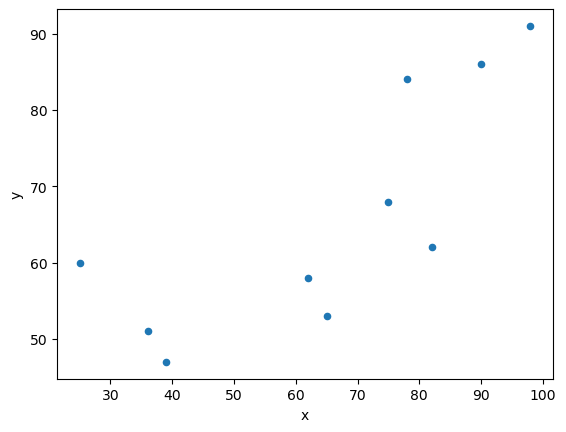

In [60]:
import pandas as pd

x = [39, 65, 62, 90, 82, 75, 25, 98, 36, 78]
y = [47, 53, 58, 86, 62, 68, 60, 91, 51, 84]

ds_x = pd.Series(x)
ds_y = pd.Series(y)

ds = pd.DataFrame({'x': x, 'y':y})

print("X mean is", ds_x.mean())
print("Y mean is", ds_y.mean())

print("The means are:")
display(ds.mean())

print("The std devs are:")
display(ds.std())

# We only want the value between X and Y so we filter the result on first line second column with iloc (iloc[1,0] gives the same result)
print("The covariance of X and Y is:")
display(ds.cov().iloc[0,1].round(2))

display(ds.cov())

print("Pearson's correlation : ")
print(round(ds.cov().iloc[1,0]/ds.std().prod(),2))

# or using the function of pandas
print(round(ds.corr(method='pearson'),2))

ds.plot.scatter(x='x', y='y')

## Normal distribution and Central Limit Theorem

1. The heights of women in the United States are normally distributed with a mean of 64 inches and a standard deviation of 2.75 inches. What is the percent of women whose heights are between 64 and 69.5 inches ?

REPONSE : 69,5 is the mean + 2 std dev. Sachant que mean +- 2 std dev = 95%, il y a aura 47,5% des femmes entre 64 et 69,5 inches

2. You repeatedly draw samples of size 100 from a population with a continuous uniform distribution on the interval $[0, 160]$. The mean of this population is $\mu=80$. For each sample, you calculate the sum $X$ of the 100 values.

a) What is the expected distribution of these sums $X$ ?

b) What is the probability that the sum for one sample will be less than 8000?

<Axes: ylabel='Frequency'>

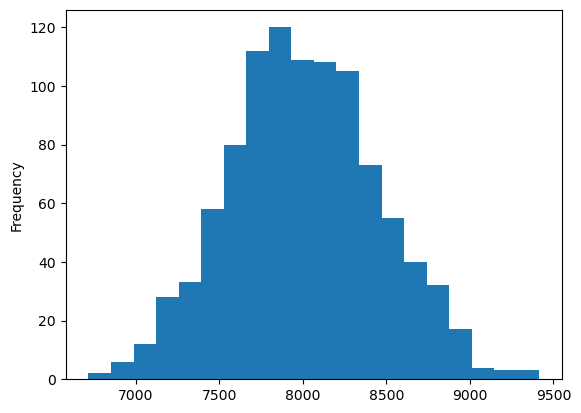

In [71]:
import pandas as pd
import random

ds = pd.Series(index=range(0,1000), dtype=float)
for i in range(0,1000):
    sample = pd.Series([random.uniform(0,160) for i in range(100)])
    ds[i] = sample.sum()


ds.plot.hist(bins=20)

## Confidence intervals

Use the following information to answer the next seven questions. You draw a sample of size 30 from a normally distributed population with a standard deviation $\sigma = 4$.

1. What is the appropriate z-value and margin of error for a 95% confidence level for this data ?

2. Rounding to two decimal places, what is the 95% confidence interval if the sample mean is $\mu=41$?

3. What is the 90% confidence interval if the sample mean is $\mu=41$ ? Round to two decimal places

4. Suppose the sample size in this study had been 50, rather than 30. What would the 95% confidence interval be if the sample mean is 41? Round your answer to two decimal places.

5. For any given data set and sampling situation, which would you expect to be wider: a 95% confidence interval or a 99% confidence interval?

Use the following information to answer the next three questions. Body temperature is known to be distributed normally among healthy adults. You collect data from a random sample of $n=20$ healthy adults and find that your sample temperatures have a mean $\bar X = 98.4$ and a sample standard deviation $s = 0.3$ (both in degrees Fahrenheit).

6. What is the degrees of freedom (df) for this study?

7. For a 95% confidence interval, what is the appropriate t-value to use in the formula?

8. What is the 95% confidence interval?

Use this information to answer the next three questions. You conduct a poll of 500 randomly selected city residents, asking them if they own an automobile. 280 say they do own an automobile, and 220 say they do not.

9. Calculate the sample proportion of residents owning an automobile.

10. What is the 95% confidence interval? Round to four decimal places.

11. Calculate the 90% confidence interval. Round to four decimal places.

Use the following information to answer the next two questions. You are planning to conduct a poll of community members age 65 and older, to determine how many own mobile phones. You want to produce an estimate whose 95% confidence interval will be within four percentage points (plus or minus) the true population proportion. Use an estimated population proportion of 0.5.

12. What sample size do you need?

13. Suppose you knew from prior research that the population proportion was $p = 0.6$. What sample size would you need?


## Hypothesis testing

### Definitions

1. The mean household value in a city is \$268,000. You believe that the mean household value in a particular neighborhood is lower than the city average. Write the null and alternative hypotheses to test this.

2. State the appropriate alternative hypothesis to this null hypothesis: $H_0$: $\mu = 107$

3. State the appropriate alternative hypothesis to this null hypothesis: $H_0$: $p < 0.25$

4. A new blood test is being developed to screen patients for cancer. Positive results are followed up by a more accurate (and expensive) test. It is assumed that the patient does not have cancer. Describe the null hypothesis, the Type I and Type II errors for this situation, and explain which type of error is more serious.

### Distribution needed for hypothesis testing

5. If you are conducting a hypothesis test of a single population mean, and you do not know the population variance, what test will you use if the sample size is 10 and the population is normal?

6. If you are conducting a hypothesis test of a single population mean, and you know the population variance, what test will you use?

7. Published information indicates that, on average, college students spend less than 20 hours studying per week. You draw a sample of 25 students from your college, and find the sample mean to be 18.5 hours, with a standard deviation of 1.5 hours. What distribution will you use to test whether study habits at your college are the same as the national average, and why?

### Conducting a hypothesis test

8. You are conducting a study with a significance level $\alpha = 0.05$. If you get a result with a $p$-value of 0.07, what will be your decision?

9. You are conducting a study with $\alpha = 0.01$. If you get a result with a $p$-value of 0.006, what will be your decision?